### Stock Market Prediction And Forecasting Using Stacked LSTM

In [2]:
### Keras and Tensorflow >2.0

In [93]:
df.to_csv('AAPL.csv')

In [94]:
import pandas as pd

In [95]:
df=pd.read_csv('AAPL.csv')

In [96]:
df.head()

,Unnamed: 0,Unnamed: 0.1,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [99]:
df.tail()

,Unnamed: 0,Unnamed: 0.1,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [100]:
df1=df.reset_index()['close']

In [101]:
df1.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

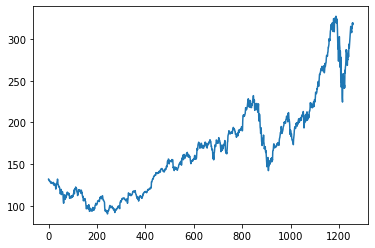

In [102]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [103]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [104]:
import numpy as np

In [105]:
df1.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [52]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [107]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [108]:
training_size,test_size

(817, 441)

In [110]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [111]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [112]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [113]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [114]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [115]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [116]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [117]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [118]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 276ms/step - loss: 0.0202 - val_loss: 0.0630
Epoch 2/100
12/12 [==============================] - 2s 154ms/step - loss: 0.0040 - val_loss: 0.0044
Epoch 3/100
12/12 [==============================] - 2s 168ms/step - loss: 0.0012 - val_loss: 0.0071
Epoch 4/100
12/12 [==============================] - 2s 182ms/step - loss: 8.0556e-04 - val_loss: 0.0040
Epoch 5/100
12/12 [==============================] - 2s 155ms/step - loss: 7.2873e-04 - val_loss: 0.0040
Epoch 6/100
12/12 [==============================] - 2s 173ms/step - loss: 7.3034e-04 - val_loss: 0.0041
Epoch 7/100
12/12 [==============================] - 2s 162ms/step - loss: 6.6957e-04 - val_loss: 0.0038
Epoch 8/100
12/12 [==============================] - 2s 172ms/step - loss: 6.7102e-04 - val_loss: 0.0038
Epoch 9/100
12/12 [==============================] - 2s 164ms/step - loss: 6.6324e-04 - val_loss: 0.0038
Epoch 10/100
12/12 [==============================] - 2s 157ms/step

12/12 [==============================] - 2s 163ms/step - loss: 2.1765e-04 - val_loss: 0.0014
Epoch 79/100
12/12 [==============================] - 2s 156ms/step - loss: 2.1139e-04 - val_loss: 0.0014
Epoch 80/100
12/12 [==============================] - 2s 158ms/step - loss: 2.2147e-04 - val_loss: 0.0012
Epoch 81/100
12/12 [==============================] - 2s 162ms/step - loss: 2.3245e-04 - val_loss: 0.0011
Epoch 82/100
12/12 [==============================] - 2s 168ms/step - loss: 2.0479e-04 - val_loss: 0.0014
Epoch 83/100
12/12 [==============================] - 2s 160ms/step - loss: 2.0103e-04 - val_loss: 0.0011
Epoch 84/100
12/12 [==============================] - 2s 152ms/step - loss: 2.1169e-04 - val_loss: 0.0010
Epoch 85/100
12/12 [==============================] - 2s 151ms/step - loss: 2.0644e-04 - val_loss: 0.0016
Epoch 86/100
12/12 [==============================] - 2s 157ms/step - loss: 2.2987e-04 - val_loss: 0.0010
Epoch 87/100
12/12 [==============================] - 2s 17

In [119]:
import tensorflow as tf

In [120]:
tf.__version__

'2.5.0'

In [121]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [122]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [123]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

140.09227581710513

In [124]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

231.9488469784019

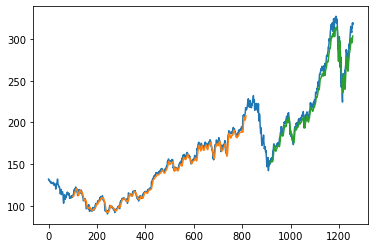

In [125]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [126]:
len(test_data)

441

In [127]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [79]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [83]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [84]:
import matplotlib.pyplot as plt

In [85]:
len(df1)

1258

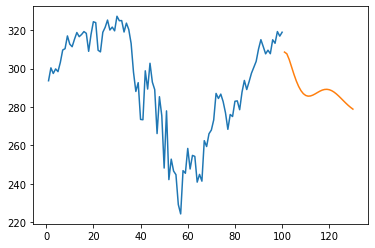

In [86]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

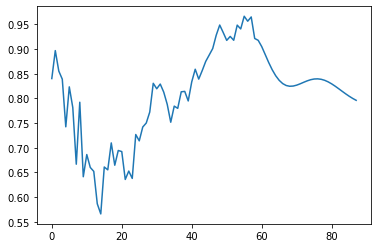

In [87]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [88]:
df3=scaler.inverse_transform(df3).tolist()

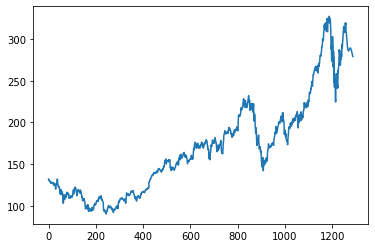

In [89]:
plt.plot(df3)